In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import yaml, pickle
from pathlib import Path
import numpy as np
import uuid
from collections import defaultdict
from IPython.display import display, HTML



from utils import figure_utils

### Load DynamicME Config, ME model, Results, COGs

In [2]:
# --- usage example ---

# Load dynamicME results
results_path = 'run_dynamicme_results/demo/demo_results.json'
results = figure_utils.load_results(results_path)

#Config file and parameters
cfg_path = "run_dynamicme_results/demo/demo_config.yaml"
cfg, me = figure_utils.load_config_and_model(cfg_path)
V, X0, T, dt = cfg["V"], cfg["X0"], cfg["T"], cfg["dt"]   # available if needed

#Get Molecular Weights for each metabolite
mw_map = figure_utils.mw_dict_from_me(me)

#COG dataframe
cogs_file = "/source/ecolime/ecolime/characterization/data/cogs_ecoli_mg1655.csv"
cog_df = pd.read_csv(cogs_file,encoding="ISO-8859-1")
cog_df = cog_df.set_index('locus')
cog_df.head()

/usr/lib/python3.6/site-packages/cobra-0.5.11-py3.6-linux-x86_64.egg/cobra/solvers/__init__.py:63: UserWarning: No LP solvers found
  warn("No LP solvers found")
/usr/lib/python3.6/site-packages/cobra-0.5.11-py3.6-linux-x86_64.egg/cobra/io/sbml3.py:24: UserWarning: Install lxml for faster SBML I/O
  warn("Install lxml for faster SBML I/O")
/usr/lib/python3.6/site-packages/cobra-0.5.11-py3.6-linux-x86_64.egg/cobra/io/__init__.py:12: UserWarning: cobra.io.sbml requires libsbml
  warn("cobra.io.sbml requires libsbml")


,GI,gene,COG ID,COG category,COG name,COG category primary,COG class,COG description
locus,,,,,,,,
b0002,16127996,thrA,COG0460,E,Homoserine dehydrogenase,E,METABOLISM,Amino acid transport and metabolism
b3940,16131778,metL,COG0460,E,Homoserine dehydrogenase,E,METABOLISM,Amino acid transport and metabolism
b0002,16127996,thrA,COG0527,E,Aspartokinase,E,METABOLISM,Amino acid transport and metabolism
b3940,16131778,metL,COG0527,E,Aspartokinase,E,METABOLISM,Amino acid transport and metabolism
b4024,16131850,lysC,COG0527,E,Aspartokinase,E,METABOLISM,Amino acid transport and metabolism


### Plot Growth Rate & Yield

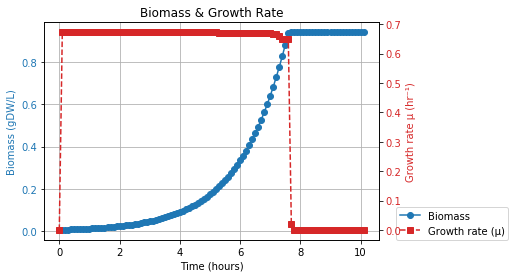

In [3]:
figure_utils.plot_growth_and_mu(results["time"], results["biomass"], results["rxn_flux"])


### Plot Biomass Components

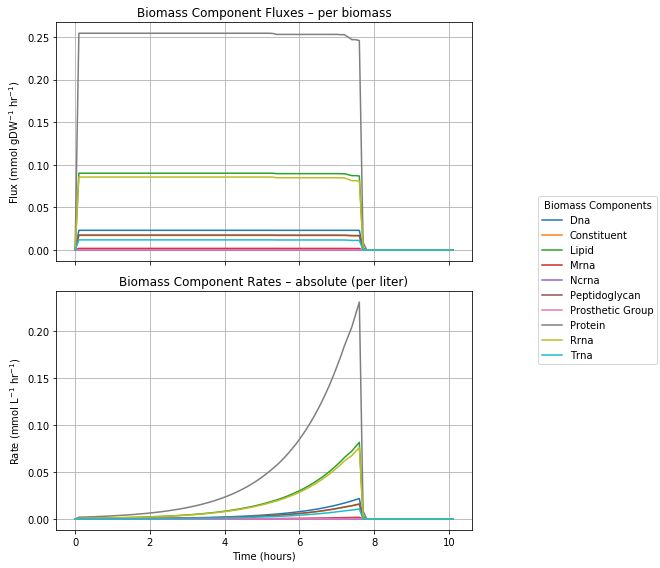

In [4]:
# Usage:
figure_utils.plot_biomass_dilution_fluxes(results)

### Plot Tracked Metabolites
##### Demo example is Media composition

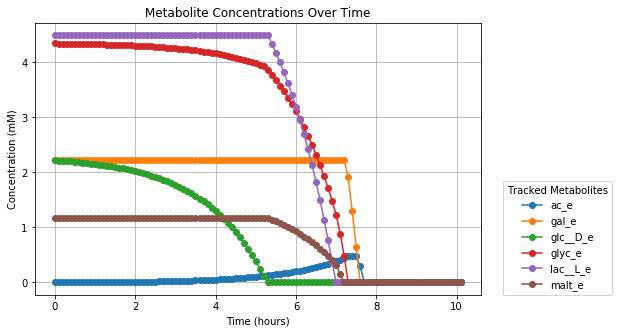

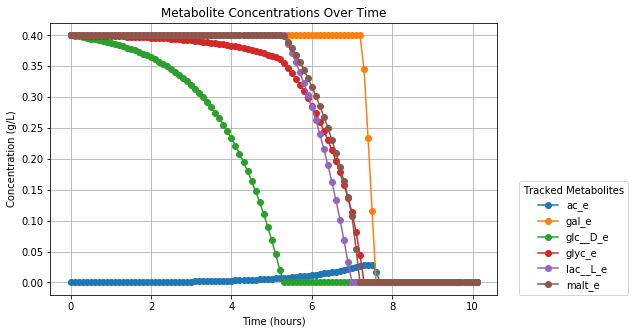

In [5]:
df_mM = figure_utils.concentrations_to_df(results["concentration"])
figure_utils.plot_concentrations(results["time"], df_mM, yunit="mM")              # mM (raw)

df_gL = figure_utils.convert_mM_to_gL(df_mM, mw_map)
figure_utils.plot_concentrations(results["time"], df_gL, yunit="g/L")             # converted



### Plot protein translation

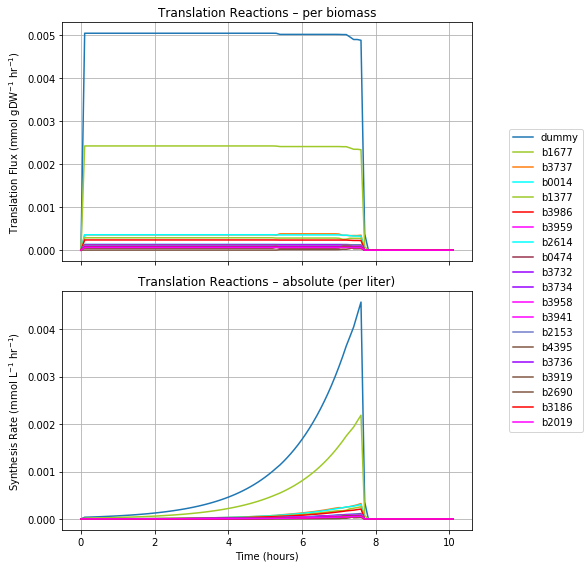

In [6]:
# Usage:
figure_utils.plot_translation_fluxes(results,cog_df,cog_colors = figure_utils.cog_colors,top_k=20)

In [17]:
results['rxn_flux'][4]['translation_b0014']

0.0003570204758714678

### Plot Complex Formations

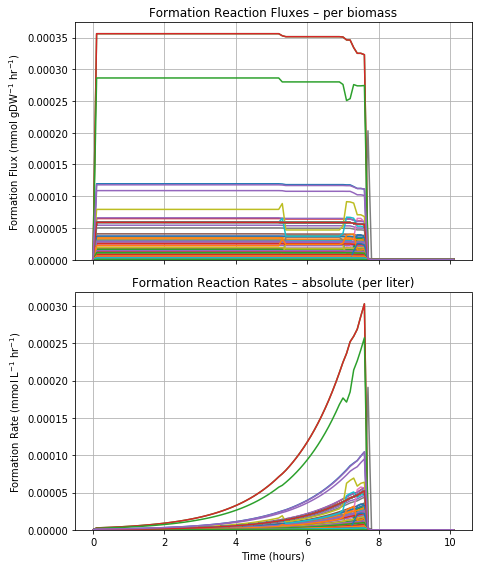

In [32]:
# Usage:
figure_utils.plot_formation_fluxes(results)

### Plot Proteome Distribution

In [21]:
# Export weights at t = 6.0 h by absolute rate (mmol L^-1 hr^-1)
df_weights = figure_utils.export_translation_weights(
    me,
    results,
    cog_df=cog_df,
    t_query=6, # select which time point you want
    value="rate", #(g L^-1 hr^-1) or "flux" (mmol gDW^-1 hr^-1), "rate" (mmol L^-1 hr^-1)
    out_file=None #path to save the file compatible with Proteomaps 

)
df_weights["COG category"] = df_weights["COG category"].fillna("Unknown")

print ("These genes do not completely match up to the coloring scheme:")
df_weights[df_weights.get('COG category').isin(figure_utils.cog_colors.keys()) == False].head()

These genes do not completely match up to the coloring scheme:


,COG category,gene,locus,weight
449,CIR,lldD,b3605,0.000012
480,EH,ilvE,b3770,0.000011
79,HI,dxs,b0420,0.000011
235,CP,nuoL,b2278,0.000006
481,EG,ilvD,b3771,0.000005


In [22]:
hier = figure_utils.build_hierarchy_for_d3_from_df(
    df_weights, 
    cog_colors=figure_utils.cog_colors,
    label_col="gene" # or 'locus' or modify df_weights with peronsalized column (i.e. gene product, uniprot id)
)
figure_utils.write_d3_voronoi_html(hier, out_html="run_dynamicme_results/demo/voronoi.html", cog_colors = figure_utils.cog_colors)


✅ Wrote: run_dynamicme_results/demo/voronoi.html
